# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [1]:
!pip install lazypredict

In [2]:
# read data and .head()
# ASSUME- data.csv from BCA (cancer analysis)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('https://media.githubusercontent.com/media/JamesPSlater/Analysis-ML-Project/main/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


### Q. Define the problem domain

In [4]:

# Diagnosing what is a fraud payment "isFraud"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Q. Identify candidate questions for your machine learning project

In [6]:
# value_counts
# discrete or continuous numbers
# what is label, what columns should be evaluated to become 
# features, Dimensions, Variables
# 
# can i use the dataset as-is or does it need cleaning?
# dfs = df.sample(n= 10000, random_state = 0)
non_frauds = df[df['isFraud']==0].sample(n = 9000)

print(non_frauds.shape)

frauds = df[df['isFraud']==1]

print(frauds.shape)

cdf = pd.concat([frauds,non_frauds]).sample(frac=1)

cdf.tail()


(9000, 11)
(8213, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6186042,567,CASH_OUT,1839972.36,C111188799,1839972.36,0.00,C493262477,172909.36,2012881.72,1,0
4270554,307,CASH_OUT,95232.06,C2085756495,1783.00,0.00,C1177546771,1189053.52,1284285.58,0,0
3291338,252,CASH_IN,361350.55,C705571879,51586.00,412936.55,C1185125460,69140.87,0.00,0,0
6034793,476,CASH_OUT,1048.63,C82858527,1048.63,0.00,C390897002,62895.35,63943.98,1,0
3960312,294,TRANSFER,290090.57,C1056695718,290090.57,0.00,C651955391,0.00,0.00,1,0


In [7]:
cdf['step'].value_counts().sum()

17213

In [8]:
cdf['nameDest'].value_counts().sum()

17213

In [10]:
cdf['isFraud'].value_counts()

0    9000
1    8213
Name: isFraud, dtype: int64

### Q. Generate a descriptive statistics report for the columns in your dataset

In [11]:
# data.describe().T
cdf.describe().T

,count,mean,std,min,25%,50%,75%,max
step,17213.00,303.62,191.44,1.00,161.00,281.00,404.00,743.00
amount,17213.00,796231.07,1865663.53,0.00,35745.66,166880.54,511379.90,48724097.09
oldbalanceOrg,17213.00,1217854.61,3261271.14,0.00,9188.00,107610.00,747282.40,59585040.37
newbalanceOrig,17213.00,534110.33,2554900.79,0.00,0.00,0.00,0.00,49585040.37
oldbalanceDest,17213.00,859736.59,3437213.52,0.00,0.00,0.00,540415.76,236230516.82
newbalanceDest,17213.00,1276270.69,3945288.16,0.00,0.00,138234.09,1102092.51,236726494.66
isFraud,17213.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
isFlaggedFraud,17213.00,0.00,0.03,0.00,0.00,0.00,0.00,1.00


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [12]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17213 entries, 5188008 to 3960312
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            17213 non-null  int64  
 1   type            17213 non-null  object 
 2   amount          17213 non-null  float64
 3   nameOrig        17213 non-null  object 
 4   oldbalanceOrg   17213 non-null  float64
 5   newbalanceOrig  17213 non-null  float64
 6   nameDest        17213 non-null  object 
 7   oldbalanceDest  17213 non-null  float64
 8   newbalanceDest  17213 non-null  float64
 9   isFraud         17213 non-null  int64  
 10  isFlaggedFraud  17213 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.6+ MB


In [13]:
cdf.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5188008,363,TRANSFER,7703574.71,C219294261,7703574.71,0.00,C1925673449,0.00,0.00,1,0
4234498,306,CASH_OUT,53403.43,C1136832598,20929.00,0.00,C1131866519,0.00,53403.43,0,0
1505980,143,TRANSFER,32076.17,C996891607,32076.17,0.00,C1918140601,0.00,0.00,1,0
724528,37,TRANSFER,805056.66,C368539162,0.00,0.00,C1126250705,3486026.85,4291083.51,0,0
504142,20,CASH_OUT,151100.18,C1627712454,5532.00,0.00,C536768224,1895665.20,2372663.77,0,0


In [14]:
cdf.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6186042,567,CASH_OUT,1839972.36,C111188799,1839972.36,0.00,C493262477,172909.36,2012881.72,1,0
4270554,307,CASH_OUT,95232.06,C2085756495,1783.00,0.00,C1177546771,1189053.52,1284285.58,0,0
3291338,252,CASH_IN,361350.55,C705571879,51586.00,412936.55,C1185125460,69140.87,0.00,0,0
6034793,476,CASH_OUT,1048.63,C82858527,1048.63,0.00,C390897002,62895.35,63943.98,1,0
3960312,294,TRANSFER,290090.57,C1056695718,290090.57,0.00,C651955391,0.00,0.00,1,0


Q. Is there any correlation in the data? How would you decide which columns to keep?

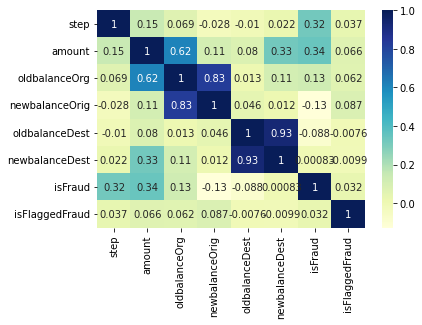

In [15]:
# SEABORN and data.corr() to plot a heatmap
# Github-> DFE6
dataplot = sns.heatmap(cdf.corr(), cmap="YlGnBu", annot=True)

In [16]:
ndf = cdf.drop(['isFlaggedFraud','step','nameOrig','nameDest'], axis = 1)



In [17]:
ndf.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
5188008,TRANSFER,7703574.71,7703574.71,0.00,0.00,0.00,1
4234498,CASH_OUT,53403.43,20929.00,0.00,0.00,53403.43,0
1505980,TRANSFER,32076.17,32076.17,0.00,0.00,0.00,1
724528,TRANSFER,805056.66,0.00,0.00,3486026.85,4291083.51,0
504142,CASH_OUT,151100.18,5532.00,0.00,1895665.20,2372663.77,0


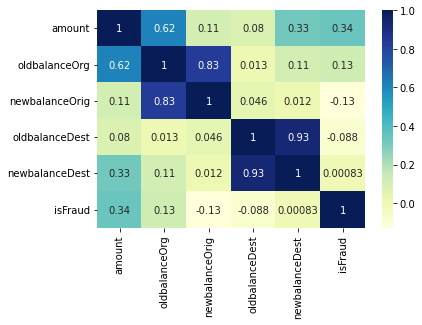

In [18]:
dataplot2 = sns.heatmap(ndf.corr(), cmap="YlGnBu", annot=True)

Q. Is there any imbalance in the label
?

In [19]:
# LABEL COLUMN-> Y/value you want to predict
# diagnosis column from bca
# Cat = 100, Parrot= 50, Ant= 5
# either no action action required or just del extra rows!

# if one class is less than quarter of the other class,
# the data is imbalanced!
#
# Regression- NO ACTION REQUIRED. 
# Classification (LABEL/Y) - Diagnosis
# 1) Del some of the rows of the larger dataset 
# 2) OR generate FAKE/SIMULATED data 
# 3) Ignore if you want to take a leap of faith in the model

Prediction column a bool

In [20]:
ndf['isFraud'].value_counts()

0    9000
1    8213
Name: isFraud, dtype: int64

Q. Are there any outliers in the dataset? What do you do with them?

In [21]:
# OPTIONAL
# Z-Score
# check for values >3 and <-3
# What do i do with them?
# 1) Remove them 
# 2) replace all >3 with max, <-3 with min
# 3) Ignore

# Detecting Frauds, Anomalies 

In [22]:
ndf['type'].value_counts()

CASH_OUT    7356
TRANSFER    4843
PAYMENT     3002
CASH_IN     1938
DEBIT         74
Name: type, dtype: int64

In [23]:
ndf['type'] = ndf['type'].replace({'CASH_OUT':0, 'TRANSFER': 1 , 'PAYMENT': 2, 'CASH_IN': 3, 'DEBIT': 4})
#| CASH_OUT = 0 | TRANSFER = 1 | PAYMENT = 2 | CASH_IN = 3| DEBIT = 4



In [24]:
zdata = ndf.apply(zscore)
zdata

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
5188008,0.01,3.70,1.99,-0.21,-0.25,-0.32,1.05
4234498,-0.94,-0.40,-0.37,-0.21,-0.25,-0.31,-0.96
1505980,0.01,-0.41,-0.36,-0.21,-0.25,-0.32,1.05
724528,0.01,0.00,-0.37,-0.21,0.76,0.76,-0.96
504142,-0.94,-0.35,-0.37,-0.21,0.30,0.28,-0.96
...,...,...,...,...,...,...,...
6186042,-0.94,0.56,0.19,-0.21,-0.20,0.19,1.05
4270554,-0.94,-0.38,-0.37,-0.21,0.10,0.00,-0.96
3291338,1.93,-0.23,-0.36,-0.05,-0.23,-0.32,-0.96
6034793,-0.94,-0.43,-0.37,-0.21,-0.23,-0.31,1.05


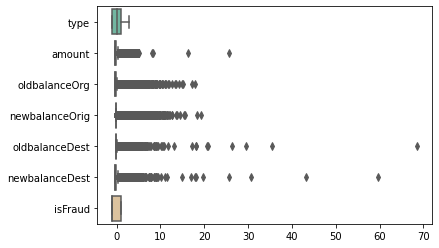

In [25]:
zdata = ndf.apply(zscore)
ax = sns.boxplot(data=zdata, orient="h", palette="Set2")

Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [26]:
# if you are not sure, do label ENCODING
# unique_values = data['diagnosis'].value_counts()
# Form a dictionary of the unique values!
# encoding_funk = lambda x : dictionary[x]
# data['my_string_column'] = data['my_string_column'].apply(encoding_funk)

In [27]:
''' ndf['type'] = ndf['type'].replace({'CASH_OUT':0, 'TRANSFER': 1 , 'PAYMENT': 2, 'CASH_IN': 3, 'DEBIT': 4})
| CASH_OUT = 0 | TRANSFER = 1 | PAYMENT = 2 | CASH_IN = 3| DEBIT = 4'''


" ndf['type'] = ndf['type'].replace({'CASH_OUT':0, 'TRANSFER': 1 , 'PAYMENT': 2, 'CASH_IN': 3, 'DEBIT': 4})\n| CASH_OUT = 0 | TRANSFER = 1 | PAYMENT = 2 | CASH_IN = 3| DEBIT = 4"

In [28]:
# One hot encoding-> pandas-> get_dummies 

# data['diagnosis'] - get_dummies


# if there are too many values-> one-hot encoding is NOT an option

# GROUP_BY on ZIP_code or country or state!
# or del that column altogether!

# One Hot encoding

# Sales City Profit
#  100.  London  20
#. 100.  Papua.  60
#  123.  London. 21
#. 65.   Paris.  13
#. 92.   Bandar Seri Begawan 22

# 2 kinds of ML problems- 
# 1) i can use city as a filter and generate multiple models
# one for each city

# 2) Or make a model that is GENERALIZED for each city and impacted
# equally by each city

# result of one hot encoding
# Sales City_London City_Papua City_Paris City_BSB Profit
#  100.  1            0         0          0          20
#. 100.  0            1         0           0      .  60
#  123.  1.            0         0          0         21
#. 65.   0             0         1          0      .  13
#. 92.   0            0          0          1         22




# final ml equation
# profit -> label
# features-> [ 'Sales', 'Cit....']
# profit=w1*Sales+w2*C_Lon+w3*C_Pap+w4*C_Par+w5*City_BSB + bias

# Sales from london
# 20=w1*100 + w2*1+ w3*0+ w4*0+ w5*0 + bias
# 21=w1*123 + w2*1+ w3*0+ w4*0+ w5*0 + bias

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [29]:
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest = train_test_split(x, y,
#                             test_size=0.2, random_state=42)

In [30]:
y = ndf.pop('isFraud')
x = ndf

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [32]:
# for loop b/w all your models

# xtrain,xtest, ytrain,ytest = train_test_split

# model.fit-> xTRAIN , xTEST
# predictions = model.predict(xtest)
# accuracy_score/rmse/mae/precision for (predictions, ytest)

# MAJOR-> string/ranges values-> convert into numbers


In [33]:
clf = LazyClassifier(verbose=0, predictions=True)
models,predictions = clf.fit(xtrain, xtest, ytrain, ytest)
models

100%|██████████| 29/29 [00:49<00:00,  1.70s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,1.00,1.00,1.00,1.00,1.05
LGBMClassifier,1.00,1.00,1.00,1.00,0.27
BaggingClassifier,1.00,1.00,1.00,1.00,0.54
RandomForestClassifier,0.99,0.99,0.99,0.99,1.30
DecisionTreeClassifier,0.99,0.99,0.99,0.99,0.21
ExtraTreesClassifier,0.99,0.99,0.99,0.99,1.48
AdaBoostClassifier,0.97,0.97,0.97,0.97,1.81
ExtraTreeClassifier,0.97,0.97,0.97,0.97,0.06
KNeighborsClassifier,0.97,0.97,0.97,0.97,0.60


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [34]:
model1 = predictions['XGBClassifier']

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [35]:
# EXPORT your model and upload to azure
# deploy to Azure Container Instance
# after 20-30 mins, consume tab will appear in your ENDPOINT
# and then paste the PYTHON code below!

In [36]:
joblib_file = "XGBModel.pk1" 
joblib.dump(predictions, joblib_file)

['XGBModel.pk1']